<a href="https://colab.research.google.com/github/lewinskie254/eda/blob/main/Heteroskedasticity_two.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn
import pandas as pd

In [2]:
df = pd.read_csv("http://ishelp.info/data/insurance.csv")

In [3]:
smokers = df[df["smoker"] == "yes"]
nonsmokers = df[df["smoker"] == "no"]

<Axes: xlabel='charges', ylabel='Count'>

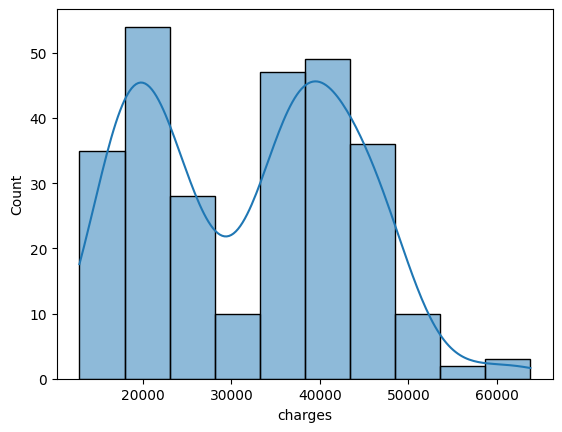

In [4]:
sns.histplot(data=smokers, x="charges", kde=True)

<Axes: xlabel='charges', ylabel='Count'>

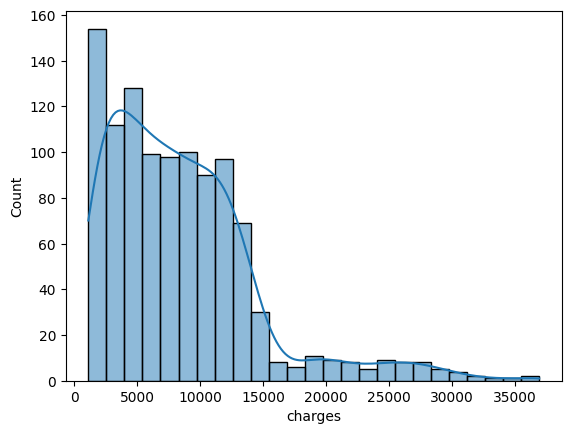

In [5]:
sns.histplot(data=nonsmokers, x="charges", kde=True)

In [6]:
df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


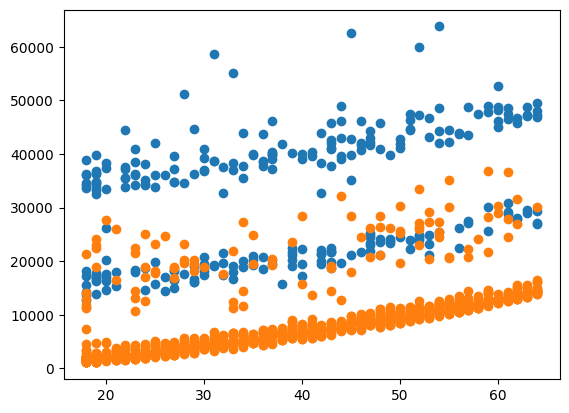

In [7]:
plt.scatter(smokers.age, smokers.charges)
plt.scatter(nonsmokers.age, nonsmokers.charges)
plt.show()

In [8]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df.age, df.charges)

In [9]:
#y = mx plus b

y = slope * df.age + intercept

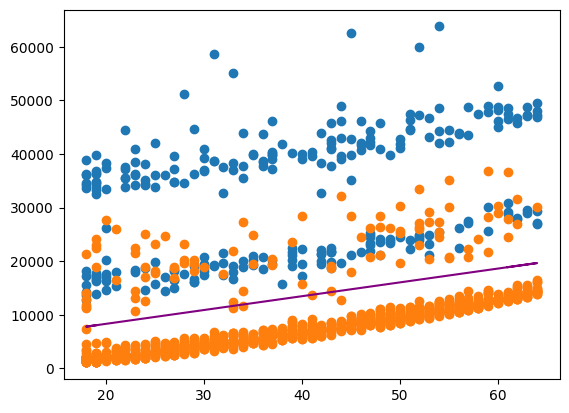

In [10]:
plt.scatter(smokers.age, smokers.charges)
plt.scatter(nonsmokers.age, nonsmokers.charges)
plt.plot(df.age, y, color="purple")
plt.show()

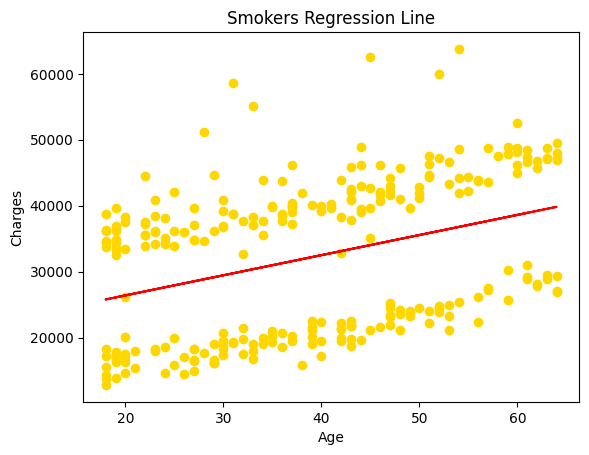

In [11]:
#regression line plot for smokers
slope, intercept, r_value, p_value, std_err = stats.linregress(smokers.age, smokers.charges)

y = slope * smokers.age + intercept

plt.scatter(smokers.age, smokers.charges, color="gold")
plt.plot(smokers.age, y, color="red")
plt.title("Smokers Regression Line")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

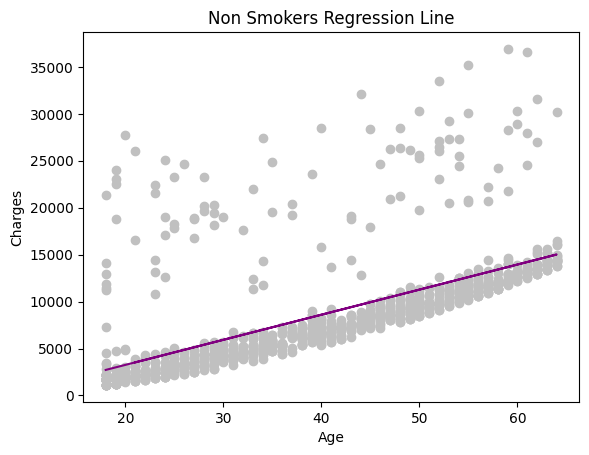

In [12]:
#regression line plot for non smokers
slope, intercept, r_value, p_value, std_err = stats.linregress(nonsmokers.age, nonsmokers.charges)

y = slope * nonsmokers.age + intercept

plt.scatter(nonsmokers.age, nonsmokers.charges, color='silver')
plt.plot(nonsmokers.age, y, color="purple")
plt.title("Non Smokers Regression Line")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

In [13]:
!pip install statsmodels

In [14]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
from statsmodels.formula.api import ols

In [15]:
model = ols(formula="age~charges", data=df).fit()

In [16]:
mse = model.ssr / model.df_resid
mse

np.float64(179.8870833985103)

In [17]:
#mean squared errors for smokers
model = ols(formula="age~charges", data=smokers).fit()

mse = model.ssr / model.df_resid
mse

np.float64(168.1864997011369)

In [18]:
#mean squared errors for non smokers
model = ols(formula="age~charges", data=nonsmokers).fit()

mse = model.ssr / model.df_resid
mse

np.float64(120.24572953603403)

In [19]:
other_details_non_smokers = df[(df['smoker'] == 'no') & (df['age'] <= 20) & (df['charges'] > 50000)]

age_bias = df[(df['age'] <= 20) & (df['charges'] > 5000)]

In [20]:
age_bias.sample(20)

,age,sex,bmi,children,smoker,region,charges
516,20,male,35.310,1,no,southeast,27724.28875
263,19,male,36.955,0,yes,northwest,36219.40545
1315,18,male,28.310,1,no,northeast,11272.33139
1223,20,female,24.420,0,yes,southeast,26125.67477
1196,19,female,30.020,0,yes,northwest,33307.55080
238,19,male,29.070,0,yes,northwest,17352.68030
126,19,female,28.300,0,yes,southwest,17081.08000
1282,18,female,21.660,0,yes,northeast,14283.45940
1026,19,male,26.030,1,yes,northwest,16450.89470
623,18,male,33.535,0,yes,northeast,34617.84065


In [21]:
from collections import Counter


counter = Counter(round(age_bias.bmi, 0))

In [22]:
counter

Counter({28.0: 7,
         32.0: 4,
         22.0: 6,
         30.0: 3,
         25.0: 1,
         37.0: 2,
         35.0: 4,
         29.0: 3,
         17.0: 1,
         27.0: 5,
         38.0: 2,
         33.0: 2,
         34.0: 2,
         31.0: 2,
         42.0: 1,
         26.0: 1,
         45.0: 1,
         36.0: 1,
         39.0: 2,
         24.0: 1})

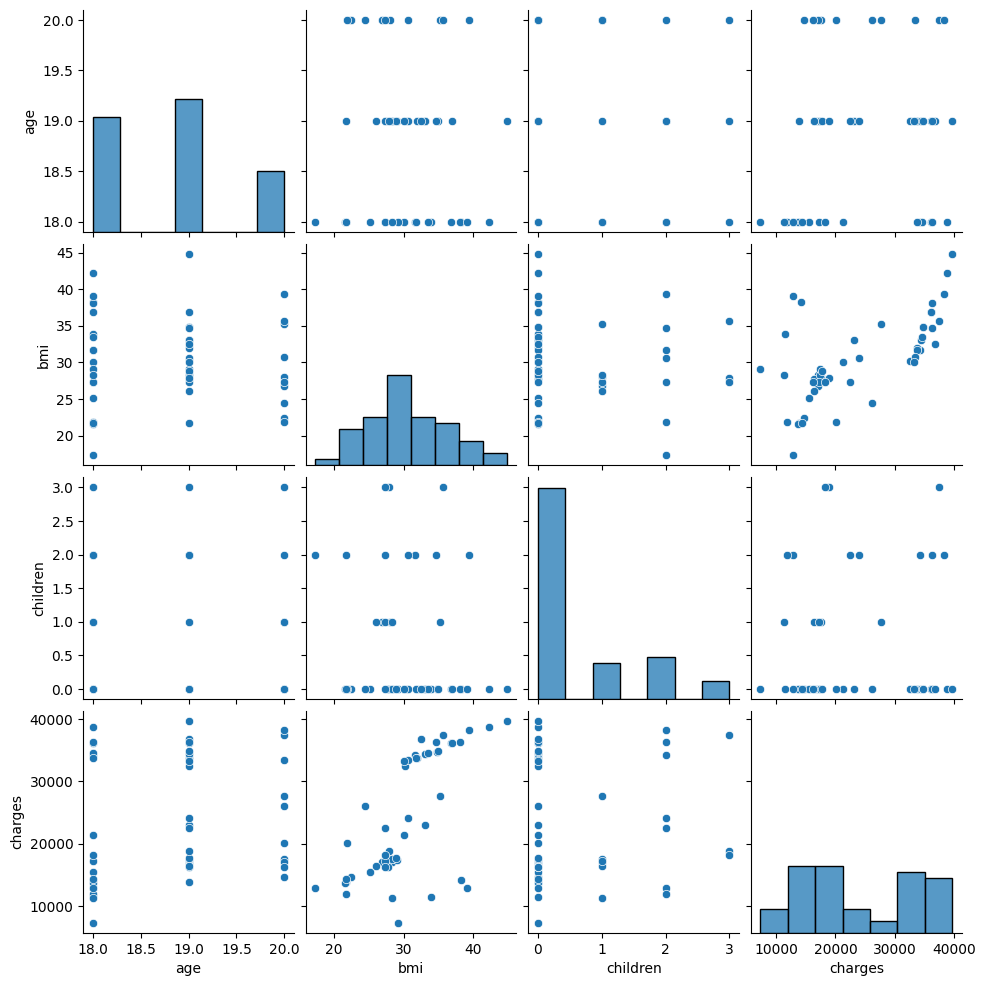

In [23]:
sns.pairplot(age_bias)

In [24]:
#let's try to add a residual plot

import statsmodels.api as sm

X = df[['age']]          # independent variable(s)
X = sm.add_constant(X)   # adds intercept term
y = df['charges']        # dependent variable

model = sm.OLS(y, X).fit()


In [25]:
residuals = model.resid        # actual - predicted
predictions = model.fittedvalues
#regression line plot for non smokers
slope, intercept, r_value, p_value, std_err = stats.linregress(df.age, df.charges)

y = slope * df.age + intercept

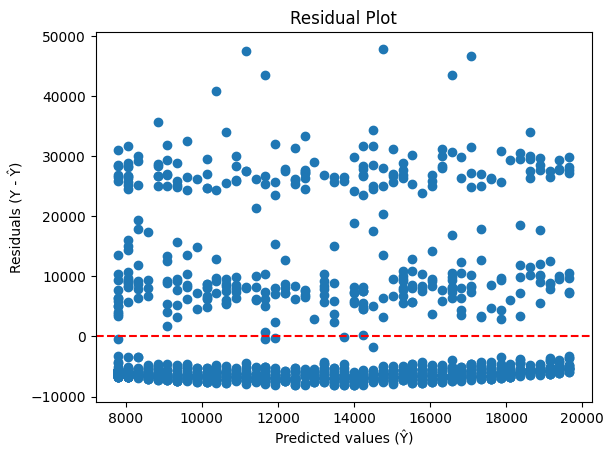

In [26]:
plt.scatter(predictions, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted values (Ŷ)')
plt.ylabel('Residuals (Y - Ŷ)')
plt.title('Residual Plot')
plt.show()


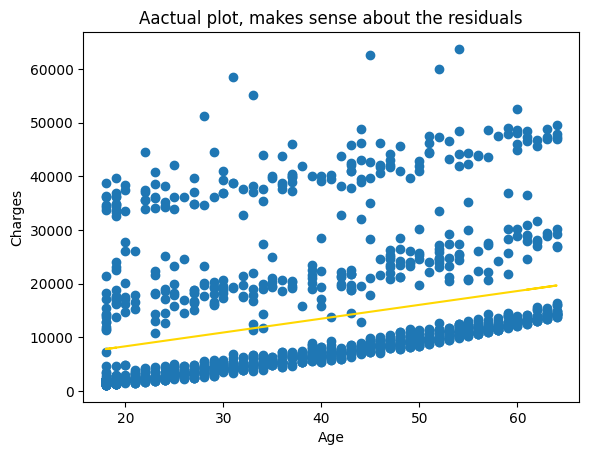

In [27]:
plt.scatter(df.age, df.charges)
plt.plot(df.age, y, color='gold')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Aactual plot, makes sense about the residuals')
plt.show()

In [28]:
residuals = model.resid        # actual - predicted
predictions = model.fittedvalues
#regression line plot for non smokers
slope, intercept, r_value, p_value, std_err = stats.linregress(df.age, residuals)

y = slope * df.age + intercept

Text(0, 0.5, 'Residuals')

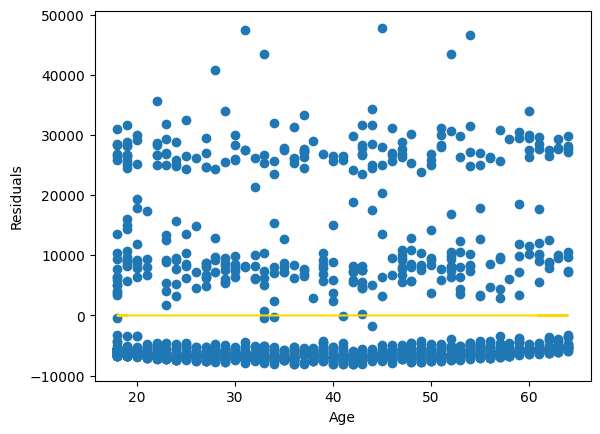

In [29]:
plt.scatter(df.age, residuals)
plt.plot(df.age, y, color='gold')
plt.xlabel('Age')
plt.ylabel('Residuals')

In [30]:
#regression line plot for non smokers
slope, intercept, r_value, p_value, std_err = stats.linregress(df.age, np.log(df.charges))

y = slope * df.age + intercept

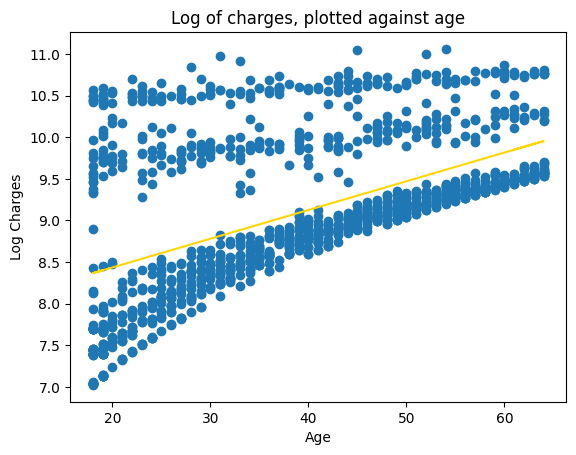

In [31]:
plt.scatter(df.age, np.log(df.charges))
plt.plot(df.age, y, color='gold')
plt.xlabel('Age')
plt.ylabel('Log Charges')
plt.title('Log of charges, plotted against age')
plt.show()

In [32]:
std_err

np.float64(0.0015207983609832536)

In [33]:
#regression line plot for logcharges smokers
slope, intercept, r_value, p_value, std_err = stats.linregress(smokers.age, np.log(smokers.charges))

y = slope * smokers.age + intercept

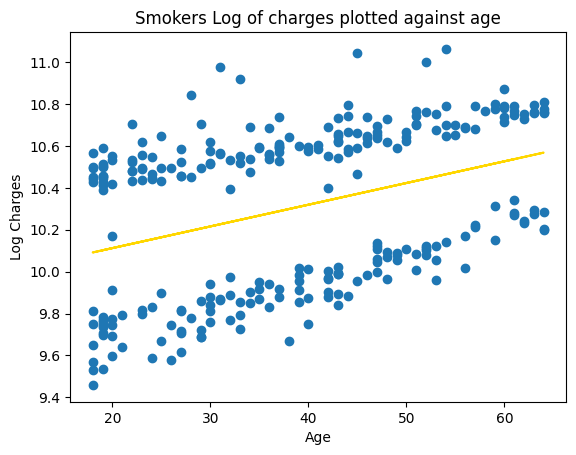

In [34]:
plt.scatter(smokers.age, np.log(smokers.charges))
plt.plot(smokers.age, y, color='gold')
plt.xlabel('Age')
plt.ylabel('Log Charges')
plt.title('Smokers Log of charges plotted against age')
plt.show()

In [35]:
std_err

np.float64(0.001566422078540454)

In [36]:
#regression line plot for logcharges smokers
slope, intercept, r_value, p_value, std_err = stats.linregress(nonsmokers.age, np.log(nonsmokers.charges))

y = slope * nonsmokers.age + intercept

In [37]:
std_err

np.float64(0.0009838508054688263)

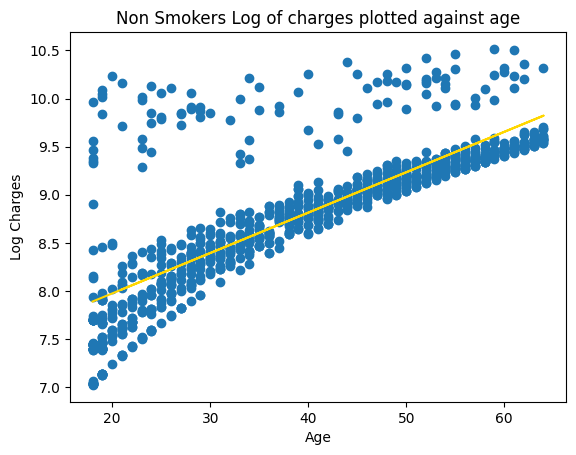

In [38]:
plt.scatter(nonsmokers.age, np.log(nonsmokers.charges))
plt.plot(nonsmokers.age, y, color='gold')
plt.xlabel('Age')
plt.ylabel('Log Charges')
plt.title('Non Smokers Log of charges plotted against age')
plt.show()

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [40]:
regions = df['region'].unique()
regions = {i : num for num, i in enumerate(regions)}
sex = df['sex'].unique()
sex = {i : num for num, i in enumerate(sex)}
smoker = df['smoker'].unique()
smoker = {i : num for num, i in enumerate(smoker)}

df['region'] = df['region'].map(regions)
df['sex'] = df['sex'].map(sex)
df['smoker'] = df['smoker'].map(smoker)

In [41]:
X = df[['age', 'children', 'bmi', 'region', 'sex', 'smoker']]
y = np.log(df['charges'])

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
model = LinearRegression()
model.fit(X_train, y_train)
y_preds = model.predict(X_test)
def root_mean_squared(y, yhat):
    n = len(y)
    error = np.sqrt(np.sum((y - yhat)**2) / n)
    mean = np.mean(y)
    return f"{round(error/mean * 100, 2)} %"

error = root_mean_squared(y_test, y_preds)

In [43]:
error

'4.91 %'

In [44]:
#heteroskedasticity starting point

from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
from statsmodels.formula.api import ols


In [45]:
model = ols(formula="charges~age", data=df).fit()
white_test = het_white(model.resid, model.model.exog)
breuschpagan_test = het_breuschpagan(model.resid, model.model.exog)

output_df = pd.DataFrame(columns =['LM Statistic', 'LM-Test P-Value', 'F-Statistic', 'F-Test P-Value'])
output_df.loc['white'] = white_test
output_df.loc['breuschpagan'] = breuschpagan_test


In [46]:
output_df

,LM Statistic,LM-Test P-Value,F-Statistic,F-Test P-Value
white,0.002713,0.998645,0.001353,0.998648
breuschpagan,0.000413,0.983776,0.000413,0.983792


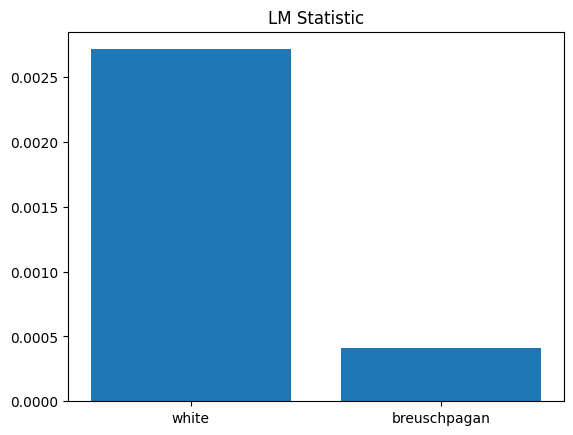

In [47]:
plt.bar(output_df.index, output_df['LM Statistic'])
plt.title('LM Statistic')
plt.show()

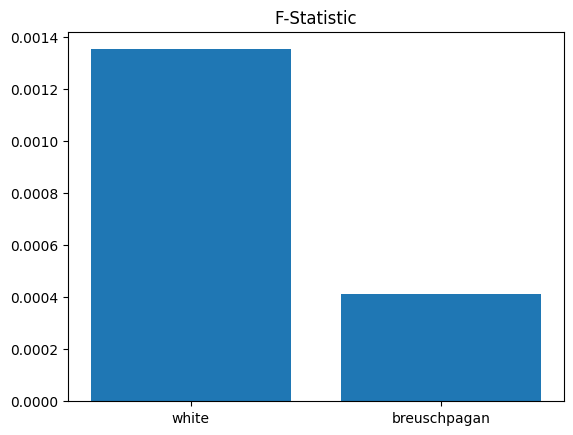

In [48]:
plt.bar(output_df.index, output_df['F-Statistic'])
plt.title('F-Statistic')
plt.show()

In [49]:
from scipy.stats import f

alpha = 0.05         # significance level
n = len(df)          # number of observations
k = len(df.columns) - 1   # number of predictors (exclude y)
dfn = k
dfd = n - k - 1

F_critical = f.ppf(1 - alpha, dfn, dfd)
print(F_critical)


2.1053813723692123


In [50]:
dfn

6

In [51]:
model = ols(formula="age~charges", data=df).fit()
white_test = het_white(model.resid, model.model.exog)
breuschpagan_test = het_breuschpagan(model.resid, model.model.exog)

output_df = pd.DataFrame(columns =['LM Statistic', 'LM-Test P-Value', 'F-Statistic', 'F-Test P-Value'])
output_df.loc['white'] = white_test
output_df.loc['breuschpagan'] = breuschpagan_test


In [52]:
output_df

,LM Statistic,LM-Test P-Value,F-Statistic,F-Test P-Value
white,113.205738,2.616293e-25,61.695937,2.358806e-26
breuschpagan,48.227283,3.795702e-12,49.955817,2.525670e-12


## Inverse Heteroskedasticity
-----------------------------
As we can see in the plot blow, when we do the inverse assessment, the heteroskedasticy here above, when we plot charges against age,
the variancce increases as we move further away from the lower charges. which is why there is a higher variance evident from the the heteroskedasticy tests \\

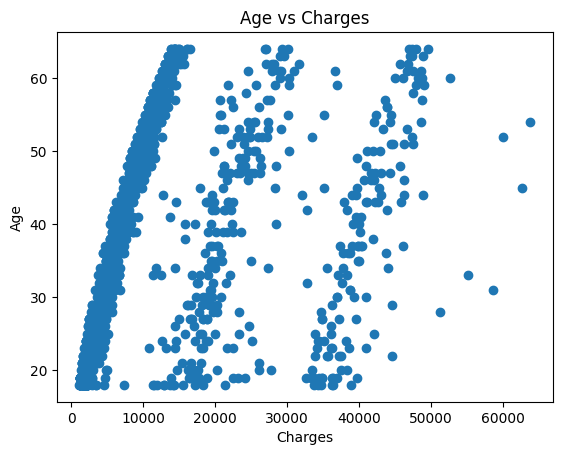

In [53]:
plt.scatter(df.charges, df.age)
plt.title('Age vs Charges')
plt.xlabel('Charges')
plt.ylabel('Age')
plt.show()

In [54]:
import seaborn as sns


In [55]:
sns.set(color_codes=True)

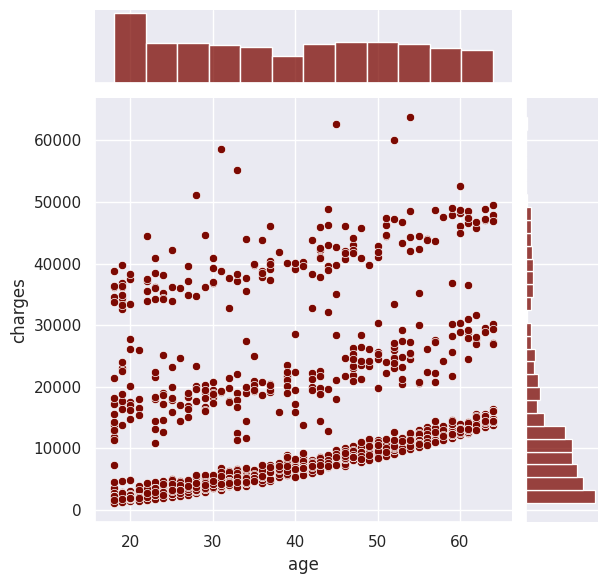

In [60]:
sns.jointplot(data=df, x="age", y="charges", color="#7C0902")
plt.show()

#shows both the scatter and the histogram

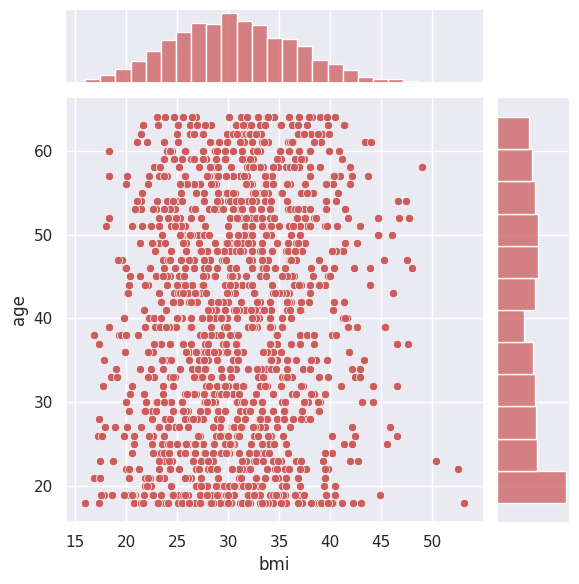

In [62]:
sns.jointplot(data=df, x="bmi", y="age", color="#CD5C5C")
plt.show()

In [64]:
X

,age,children,bmi,region,sex,smoker
0,19,0,27.900,0,0,0
1,18,1,33.770,1,1,1
2,28,3,33.000,1,1,1
3,33,0,22.705,2,1,1
4,32,0,28.880,2,1,1
...,...,...,...,...,...,...
1333,50,3,30.970,2,1,1
1334,18,0,31.920,3,0,1
1335,18,0,36.850,1,0,1
1336,21,0,25.800,0,0,1


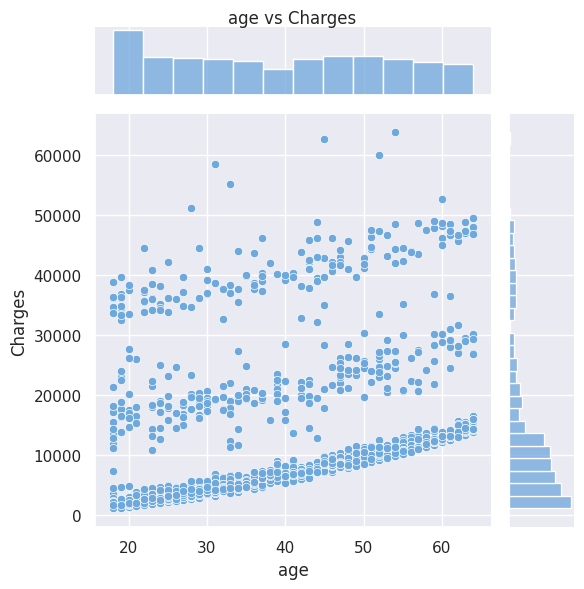

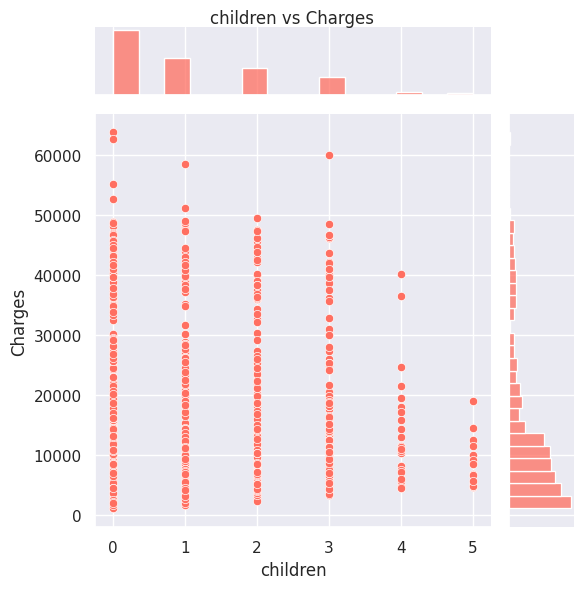

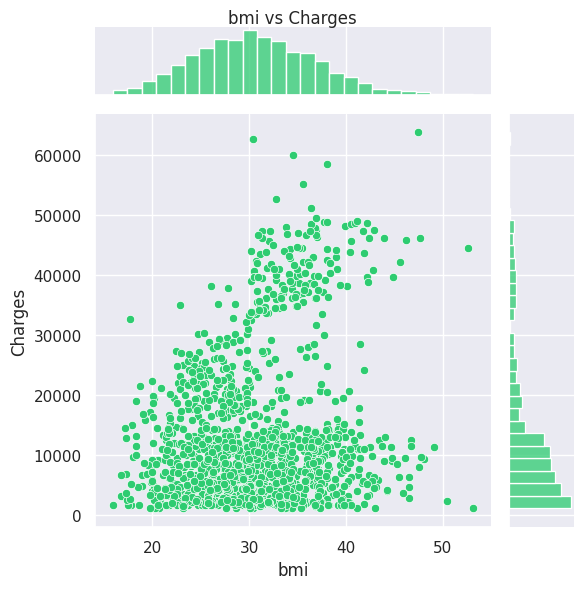

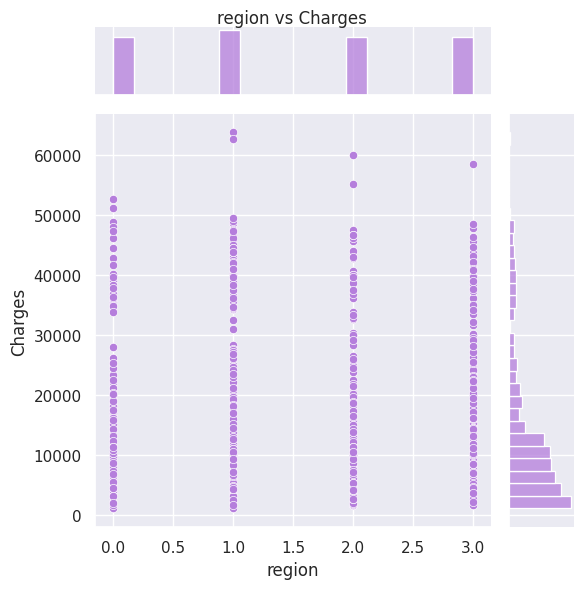

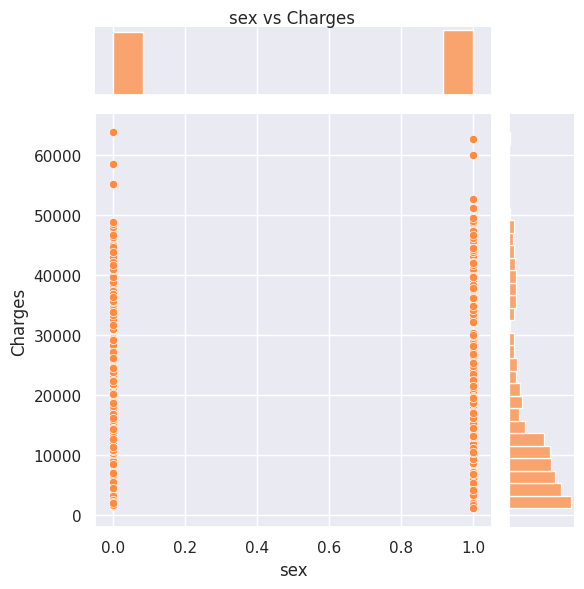

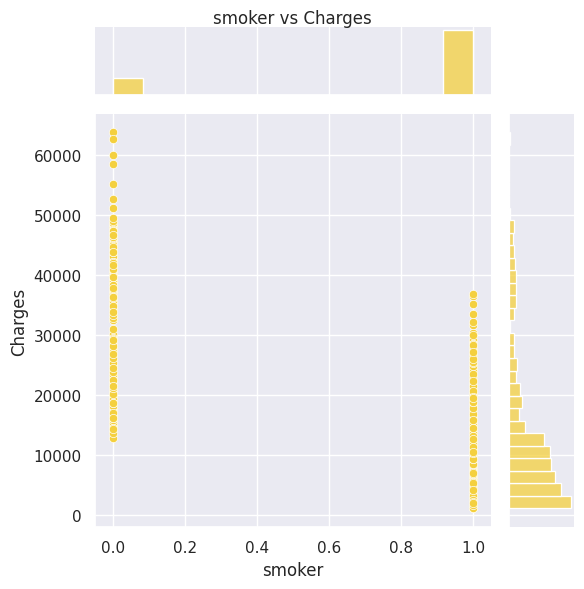

In [71]:

colors = [
    "#6FA8DC",  # Soft Blue
    "#FF6F61",  # Coral Pink
    "#2ECC71",  # Emerald Green
    "#B57EDC",  # Lavender Purple
    "#FF8C42",  # Sunset Orange
    "#F4D03F"   # Golden Yellow
]


for i, col in enumerate(X.columns):
    g = sns.jointplot(data=df, x=col, y='charges', color=colors[i])
    g.fig.suptitle(f'{col} vs Charges', fontsize=12)
    g.set_axis_labels(col, 'Charges')
    g.fig.tight_layout()
    g.fig.subplots_adjust(top=0.95)  # adjust to prevent title cutoff
    plt.show()



In [65]:
len(X.columns)

6

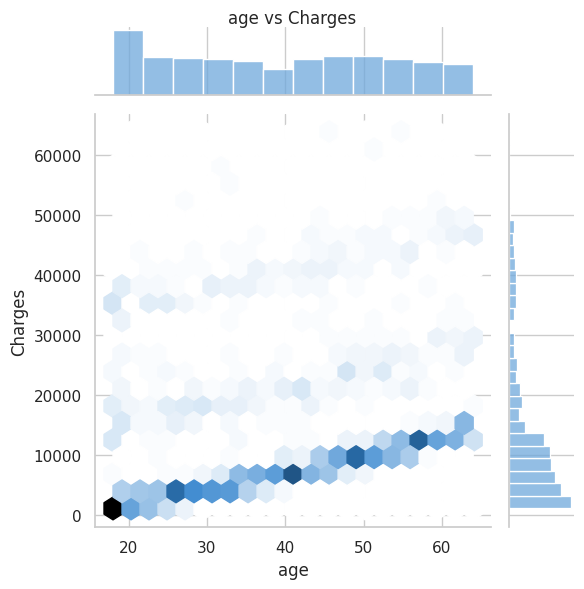

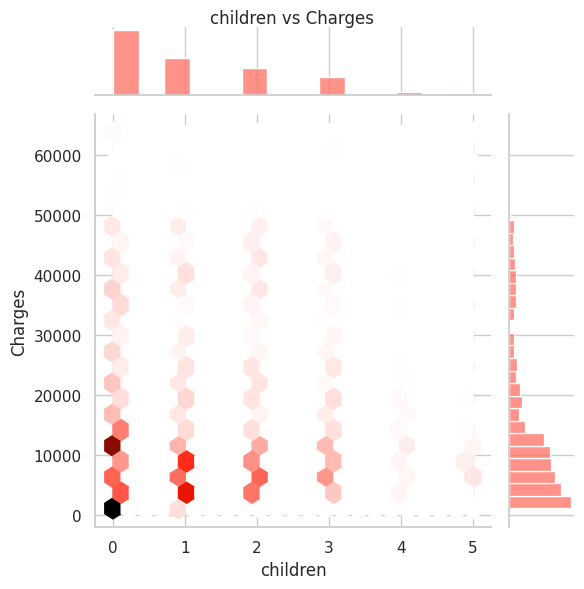

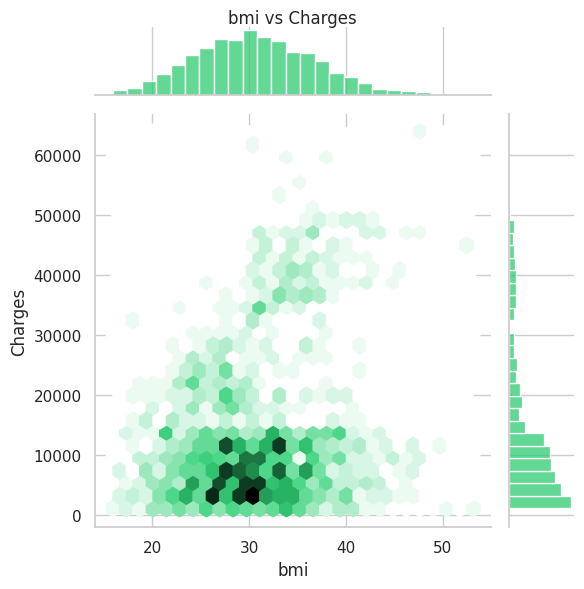

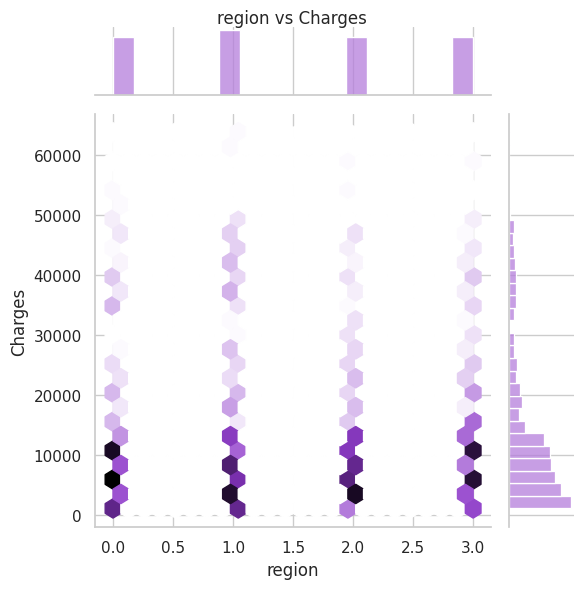

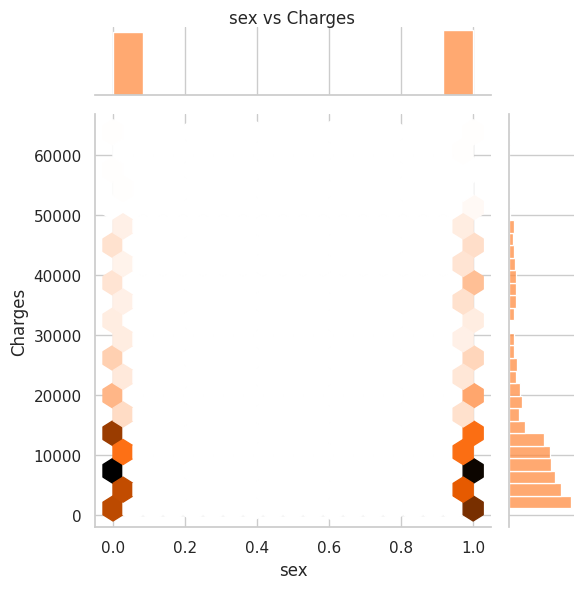

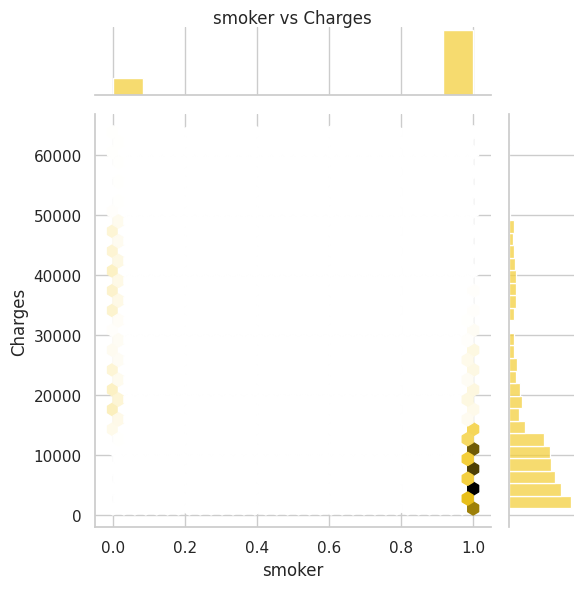

In [73]:
sns.set_style("whitegrid")
for i, col in enumerate(X.columns):
    g = sns.jointplot(data=df, x=col, y='charges', kind='hex', color=colors[i])
    g.fig.suptitle(f'{col} vs Charges', fontsize=12)
    g.set_axis_labels(col, 'Charges')
    g.fig.tight_layout()
    g.fig.subplots_adjust(top=0.95)  # adjust to prevent title cutoff
    plt.show()


#the hex plots help us see the distribution of data

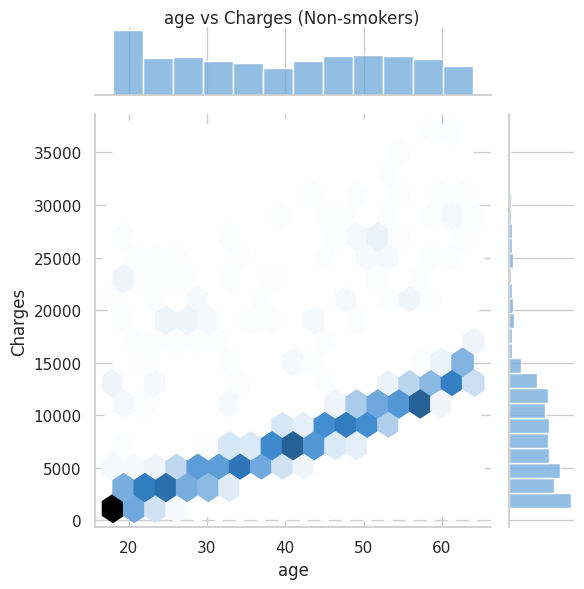

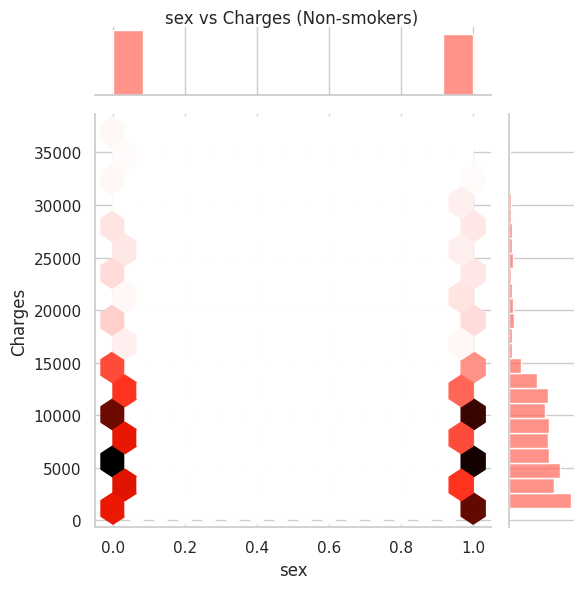

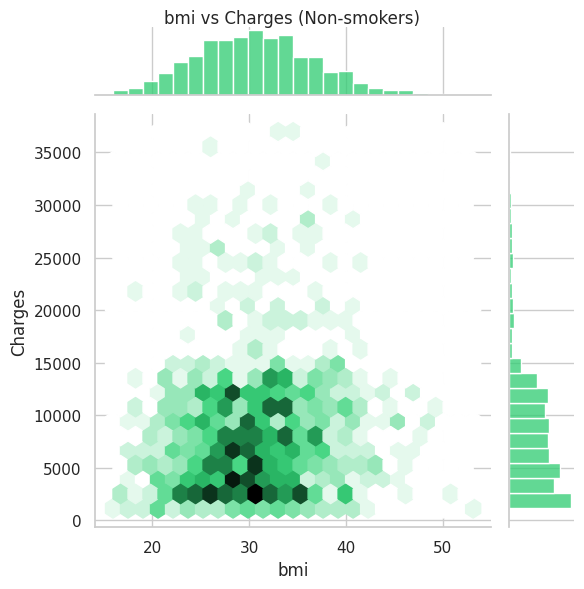

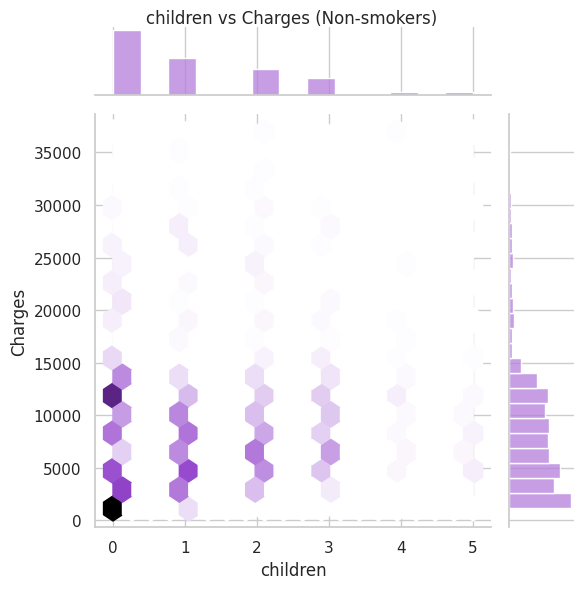

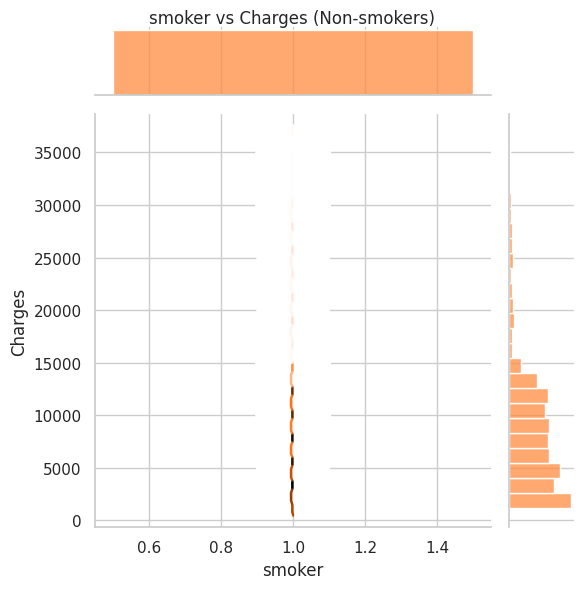

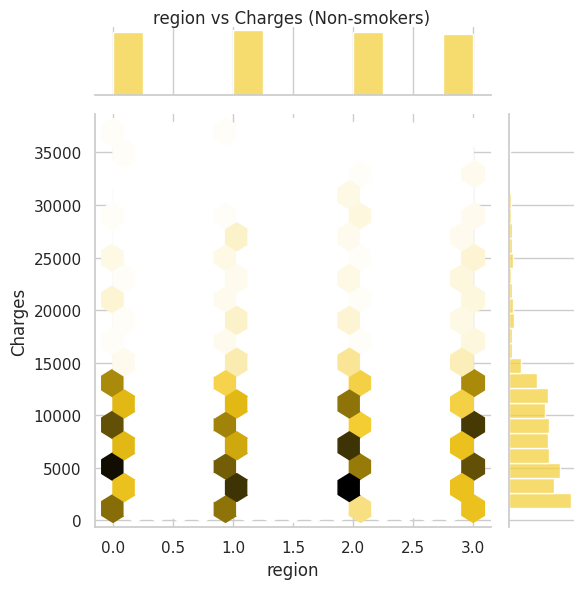

In [84]:
nonsmokers_df = df[df['smoker'] == 1] # Changed 'no' to 1
nonsmokers_x = nonsmokers_df.drop(columns=['charges'])
smokers_df = df[df['smoker'] == 0] # Changed 'yes' to 0
smokers_x = smokers_df.drop(columns=['charges'])
nonsmoker_y = nonsmokers_df['charges']
smokers_y = smokers_df['charges']

sns.set_style("whitegrid")
for i, col in enumerate(nonsmokers_x.select_dtypes(include='number').columns):
    g = sns.jointplot(
        data=nonsmokers_df,
        x=col,
        y='charges',
        kind='hex',
        color=colors[i % len(colors)]  # cycle safely through colors
    )
    g.fig.suptitle(f'{col} vs Charges (Non-smokers)', fontsize=12)
    g.set_axis_labels(col, 'Charges')
    g.fig.tight_layout()
    g.fig.subplots_adjust(top=0.95)
    plt.show()

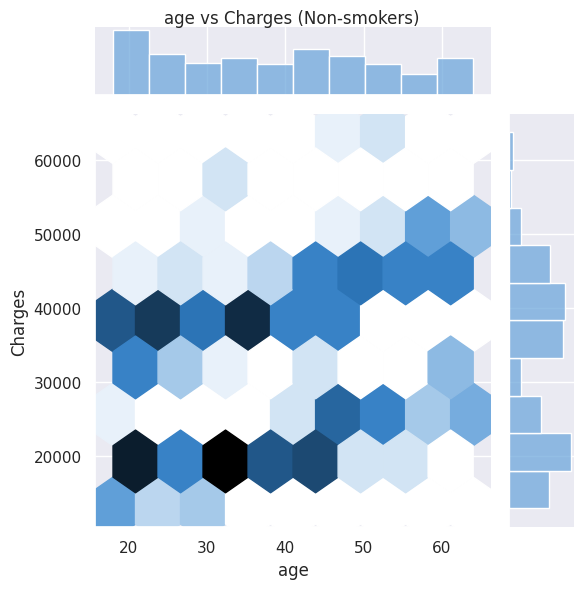

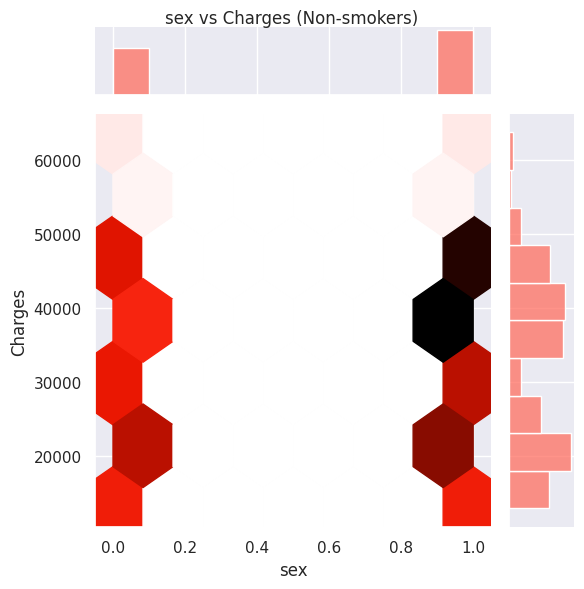

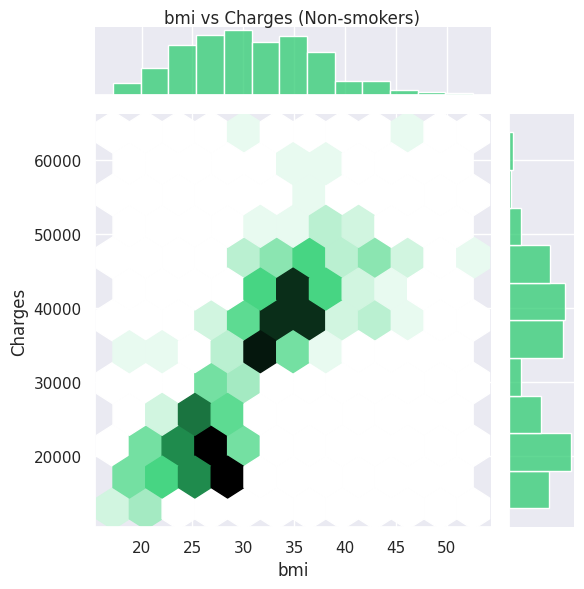

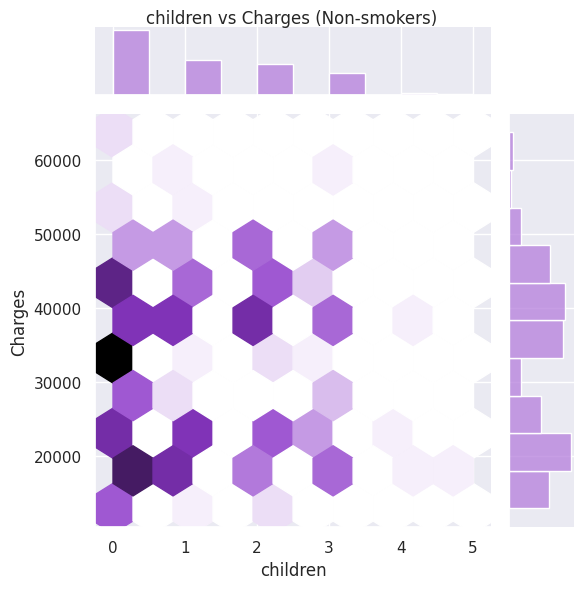

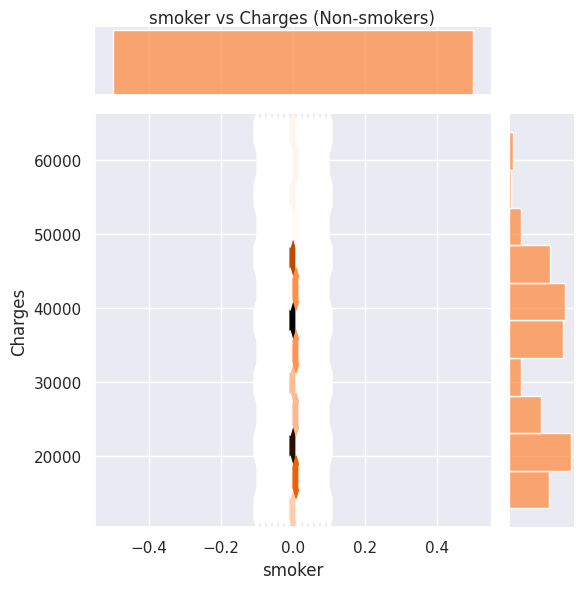

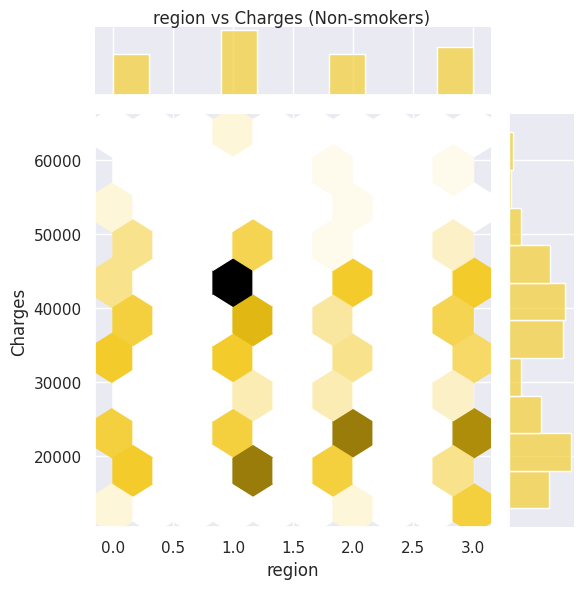

In [86]:
nonsmokers_df = df[df['smoker'] == 1] # Changed 'no' to 1
nonsmokers_x = nonsmokers_df.drop(columns=['charges'])
smokers_df = df[df['smoker'] == 0] # Changed 'yes' to 0
smokers_x = smokers_df.drop(columns=['charges'])
nonsmoker_y = nonsmokers_df['charges']
smokers_y = smokers_df['charges']

sns.set_style("darkgrid")
for i, col in enumerate(smokers_x.select_dtypes(include='number').columns):
    g = sns.jointplot(
        data=smokers_df,
        x=col,
        y='charges',
        kind='hex',
        color=colors[i % len(colors)]  # cycle safely through colors
    )
    g.fig.suptitle(f'{col} vs Charges (Non-smokers)', fontsize=12)
    g.set_axis_labels(col, 'Charges')
    g.fig.tight_layout()
    g.fig.subplots_adjust(top=0.95)
    plt.show()

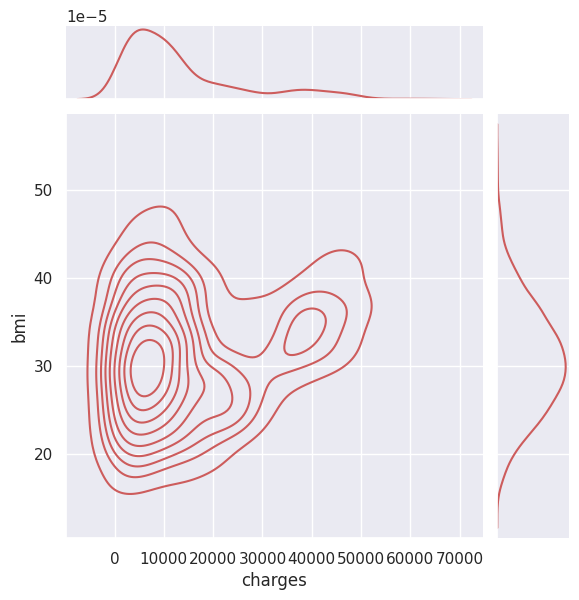

In [91]:
sns.jointplot(data=df, x="charges", y="bmi", color="#CD5C5C", kind='kde')
plt.show()

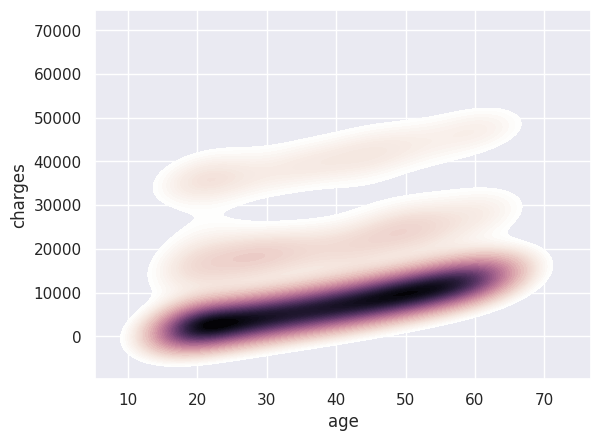

In [107]:
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=False)
sns.kdeplot(data=df, x="age", y="charges", cmap=cmap, n_levels=60, fill=True)
plt.show()

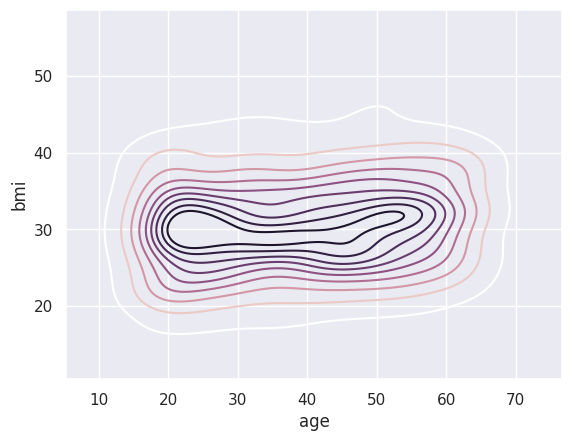

In [104]:
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=False)
sns.kdeplot(data=df, x="age", y="bmi", cmap=cmap)
plt.show()

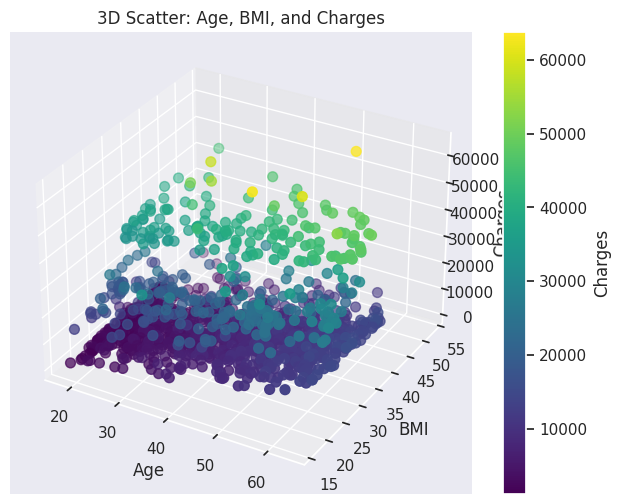

In [117]:
from mpl_toolkits.mplot3d import Axes3D  # optional in modern Matplotlib
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

x = df['age']
y = df['bmi']
z = df['charges']

# Use a color map to make the plot more informative
sc = ax.scatter(x, y, z, c=z, cmap='viridis', s=50)

# Add labels
ax.set_xlabel('Age')
ax.set_ylabel('BMI')
ax.set_zlabel('Charges')
ax.set_title('3D Scatter: Age, BMI, and Charges')

# Add color bar to show charge scale
plt.colorbar(sc, ax=ax, label='Charges')

plt.show()


In [118]:
import plotly.express as px

In [123]:
fig = px.scatter_3d(df, x='age', y='bmi', z='charges', color='children')
fig.show()